This file contains the code for visualization of the Planet amazon rainforest data set.

In [60]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from keras.layers.convolutional import Convolution2D # Convolutional Layer
from keras.layers.pooling import MaxPooling2D # Pooling --> Max 


from keras.layers import ELU # Non linear activation function

from keras.optimizers import Adam # Optimizer
from keras.layers.core import Activation, Dropout, Flatten, Dense, Lambda
import keras.backend.tensorflow_backend as KTF
from keras.models import Sequential

In [61]:
ROOT_DIR = os.getcwd()
print ROOT_DIR

/Users/chitrang/Desktop/planet_kaggle


In [62]:
TRAIN_JPEG_PATH = ROOT_DIR + "/train-jpg"
TEST_JPEG_PATH = ROOT_DIR + "/test-jpg"
TRAIN_LABELS_CSV_PATH = ROOT_DIR + "/train.csv"
print TRAIN_JPEG_PATH
print TEST_JPEG_PATH
print TRAIN_LABELS_CSV_PATH

/Users/chitrang/Desktop/planet_kaggle/train-jpg
/Users/chitrang/Desktop/planet_kaggle/test-jpg
/Users/chitrang/Desktop/planet_kaggle/train.csv


In [63]:
# Now lets read the labels in the panda frame

label_pd = pd.read_csv(TRAIN_LABELS_CSV_PATH)
label_pd.head()
row = label_pd.iloc[0]
print type(row[0])

<type 'str'>


In [64]:
# As we can see here for each image in the training data we have multiple of tags associated.
# Now lest extract first how many unique tags are present

labels_list = []
for label in label_pd.tags.values:
    tmp_labels = label.split(' ')
    for tmp_label in tmp_labels:
        if tmp_label not in labels_list:
            labels_list.append(tmp_label)

print labels_list

['haze', 'primary', 'agriculture', 'clear', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'cloudy', 'partly_cloudy', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']


In [65]:
#Now let's apply one hot encoding in the

In [66]:
label_one_hot = label_pd

In [67]:
for label in labels_list:
    label_one_hot[label] = label_pd['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
label_one_hot.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


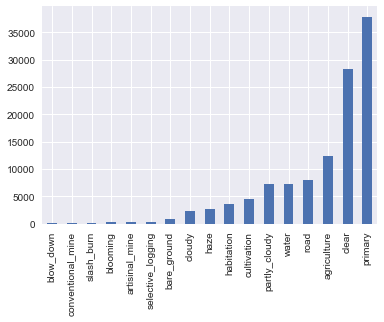

In [68]:
# Histogram of label instances
label_one_hot[labels_list].sum().sort_values().plot.bar()

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,2695,2668,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2668,37840,11990,27668,7057,3471,7733,4455,209,331,7173,94,683,324,332,340,98
agriculture,672,11990,12338,9150,2718,2737,6036,3377,119,24,2492,24,225,38,32,65,22
clear,0,27668,9150,28203,5277,3090,6295,3527,173,0,0,70,744,307,311,308,85
water,613,7057,2718,5277,7262,915,2127,868,24,85,1287,26,206,299,16,49,3
habitation,129,3471,2737,3090,915,3662,2787,895,41,2,441,36,163,29,4,13,3
road,394,7733,6036,6295,2127,2787,8076,1294,36,5,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,4477,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,209,0,33,0,10,0,2,2,2
cloudy,0,331,24,0,85,2,5,0,0,2330,0,0,0,0,0,0,0


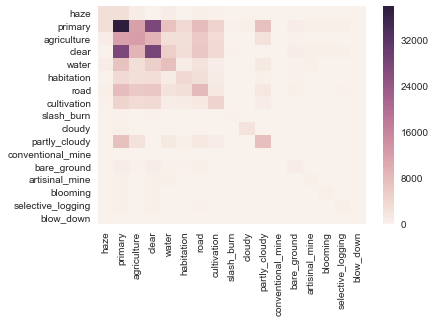

In [69]:
# As we can see from the histogram that the images with the tags primary 
# as one of the tags are very high in number of frequency.

def create_coocurrence_matrix(labels_list):
    label_only_pd = label_pd[labels_list]
    label_matrix = label_only_pd.T.dot(label_only_pd)
    sns.heatmap(label_matrix)
    return label_matrix


create_coocurrence_matrix(labels_list)

In [73]:
# Now let's seprate the data into training and validation set from the known labels.

# label_one_hot:- panda frame contains the image name and its labels with one hot encode. 

TRAINING_DATA_CSV = ROOT_DIR + "/training_data.csv"
VALIDATION_DATA_CSV = ROOT_DIR + "/validation_data.csv"

def create_train_validation_csv():

    training_data = pd.DataFrame()
    validation_data = pd.DataFrame()

    for i in xrange(len(label_pd) -1):
        rowid = np.random.randint(len(label_pd)-1)

        row_data = label_pd.iloc[[rowid]].reset_index()

        # Now lets say 30% data will be in the validation and rest will be in the training.

        rand_num = np.random.randint(9)
        if 0<= rand_num <=2:
            validation_frame = [validation_data, row_data]
            validation_data = pd.concat(validation_frame, axis = 0, join = 'outer' , ignore_index = False)

        if rand_num >= 3:
            training_frame = [training_data, row_data]
            training_data = pd.concat(training_frame , axis = 0 , join = 'outer' , ignore_index = False)


    training_data.to_csv(TRAINING_DATA_CSV)
    validation_data.to_csv(VALIDATION_DATA_CSV)

create_train_validation_csv()

/Users/chitrang/Desktop/planet_kaggle/train-jpg/train_12.jpg
(256, 256, 3)


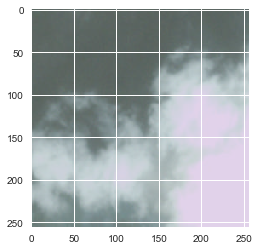

train_13162
/Users/chitrang/Desktop/planet_kaggle/train-jpg/train_13162


In [92]:
import cv2

SINGLE_IMAGE_PATH = TRAIN_JPEG_PATH + "/" +"train_12.jpg"
print SINGLE_IMAGE_PATH
#image = mpimg.imread(SINGLE_IMAGE_PATH)
img = cv2.imread(SINGLE_IMAGE_PATH, cv2.IMREAD_COLOR)    
print img.shape
plt.imshow(img)
plt.show()

train = pd.read_csv(TRAINING_DATA_CSV)
train = train.set_index("index")
row_data = train.iloc[50]
print row_data[1]
im_path = TRAIN_JPEG_PATH + "/" + row_data[1]
print im_path

In [96]:
# Let's Generate the batch for training and validation 
# Pre_processing and augmentaion 
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256
NUM_CHANEELS = 3
TOTAL_TAGS = 17

label_map = {l: i for i, l in enumerate(labels_list)}

def read_and_preprocess(image_path, width = IMAGE_WIDTH, height = IMAGE_HEIGHT):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    #img = cv2.resize(img , (IMAGE_WIDTH, IMAGE_HEIGHT), interpolation = cv2.INTER_AREA)
    return img

In [103]:
# Let's generate the training  and validation batch 
from sklearn.utils import shuffle

def generate_training_data(data, batch_size = 32):
    """This function will be useful to generate the batch of the input data"""

    image = np.zeros((batch_size, IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANEELS))
    label = np.zeros((batch_size, TOTAL_TAGS)) 
    data = data.set_index("index")
    while True:
        for i in range(batch_size):
            num_gen = np.random.randint(0, len(data) - 1)
            row_data = data.iloc[num_gen]
            im_path = TRAIN_JPEG_PATH + "/" + row_data[1]
            #print im_path
            image_single = read_and_preprocess(im_path)
            #print image_single.shape
            targets = np.zeros(17)
            for t in row_data[2].split(' '):
                targets[label_map[t]] = 1 
            image[i] = image_single
            label[i] = targets
        yield shuffle(image, label)
        

def generate_validation_data(data):
    """This function will be useful to generate validation"""
    data = data.set_index("index")
    while True:
        for i in range(len(data)):           
            row_data = data.iloc[i]
            im_path = TRAIN_JPEG_PATH + "/" + row_data[1]
            image = read_and_preprocess(im_path)
            image= image.reshape(1, image[0] , image[1] , image[2])
            targets = np.zeros(17)
            for t in row_data[2].split(' '):
                targets[label_map[t]] = 1 
            yield shuffle(image, targets)

In [104]:
def multi_class_model_keras():
    
    input_size = (IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANEELS)
    
    model = Sequential()
    
    # Will perform normalization here
    
    #model.add(Lambda(lambda x: x / 127.5  - 1), input_shape = input_size)
    
    model.add(Convolution2D(32, (3, 3), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv1', input_shape = input_size))
    model.add(ELU())
    
    
    
    model.add(Convolution2D(32, (3, 3), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv2'))
    model.add(ELU())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.25))
    
    
    model.add(Convolution2D(64, (3, 3), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv3'))
    model.add(ELU())
    
    
    
    model.add(Convolution2D(64, (3, 3), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv4'))
    model.add(ELU())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.25))
    
    
    model.add(Flatten(name = 'flatten'))
    model.add(ELU())
    model.add(Dense(1024, kernel_initializer = 'he_normal', name = 'fc1'))
    model.add(ELU())
    model.add(Dropout(0.25))
    model.add(Dense(512, kernel_initializer = 'he_normal', name = 'fc2'))
    model.add(ELU())
    model.add(Dense(128, kernel_initializer = 'he_normal', name = 'fc3'))
    model.add(ELU())
    model.add(Dropout(0.25))
    model.add(Dense(TOTAL_TAGS, kernel_initializer = 'he_normal', name = 'output'))
    model.add(Activation('sigmoid'))
    adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    model.summary()
    return model
    

In [ ]:
BATCH_SIZE = 16
train = pd.read_csv(TRAINING_DATA_CSV)

validation = pd.read_csv(VALIDATION_DATA_CSV)
training_data_gen = generate_training_data(train , BATCH_SIZE)
validation_data_gen = generate_validation_data(validation)


from keras.callbacks import EarlyStopping, ModelCheckpoint


current_path = os.getcwd()
filepath = current_path + 'planet_kaggle.h5'

earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience=1, 
                              verbose=1, 
                              min_delta = 0.23,
                              mode='min',)
modelCheckpoint = ModelCheckpoint(filepath, 
                                  monitor = 'val_loss', 
                                  save_best_only = True, 
                                  mode = 'min', 
                                  verbose = 1,
                                 save_weights_only = True)
callbacks_list = [modelCheckpoint, earlyStopping]


model = multi_class_model_keras()
train_size = train.shape[0]
validation_size = validation.shape[0]
history = model.fit_generator(
        training_data_gen, 
        steps_per_epoch = 200, 
        epochs = 20,
        callbacks = callbacks_list,
        verbose = 1,
        validation_data = validation_data_gen,
        validation_steps = validation_size)

print(history)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 254, 254, 32)      896       
_________________________________________________________________
elu_113 (ELU)                (None, 254, 254, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 252, 252, 32)      9248      
_________________________________________________________________
elu_114 (ELU)                (None, 252, 252, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 126, 126, 32)      0         
_________________________________________________________________
conv3 (Conv2D)               (None, 124, 124, 64)      18496     
__________